# Machine Learning to Classification Gender by Voice 
In this notebook I will try build ML models using sklearn to predict gender by voice. I created this notebook to apply the classification algorithms I learned. Also, this notebook may contain errors as I am a beginner. You can add mistakes you find or your suggestions to the comment. Thank You!

# Contents
* [Importing Packages and Libraries](#Importing)
* [Loading and Viewing Dataset](#Loading-Dataset)
* [Data Preprocessing](#Data-Preprocessing)
* [Train test split](#Train-test-split)
* [Data Visualization](#Visualization)
* [Logistic Regression Classification](#LR)
* [K-Nearest Neighbor Classification](#KNN)
* [Support Vector Classification](#SVM)
* [Naive Bayes Classification](#NBC)
* [Decision Tree Classification](#DTC)
* [Random Forst Classification](#RFC)

<a id="Importing"></a>
# Importing Packages and Libraries

We will use numpy for mathematical operations, pandas for reading and processing data, matplotlib and seaborn for data visualization, and sklearn to build our classification models.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/voicegender/voice.csv


<a id="Loading-Dataset"></a>
#  Loading and Viewing Data Set

We include the data set in our project using the Pandas library. Then we get general information about the data set and examine the first five rows.

In [2]:
data=pd.read_csv('../input/voicegender/voice.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


<a id="Data-Preprocessing"></a>
# Data Preprocessing

First, we check whether there is a null value in the data set with the isnull function. Because a dataset containing null values makes our work difficult. 

In [5]:
data.isnull().values.any()

False

Let's determine the dependent (y) and independent (x) variables of the data set:

In [6]:
y=data.label
x_data=data.drop(["label"],axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

Often we need to convert dependent variable values to integer types before creating an ML model. Our dependent variable is the "label" column. And built with string values ("male" and "female"). So we have to change these values. Let's replace "male" ones with 0 and "female" ones with 1 :

In [7]:
data.label=[0 if each=="male" else 1 for each in data.label]

<a id="Train-test-split"></a>
# Train Test Split

Before building our ML models, we split the data into training and test data as a final step:

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

We are now ready to build machine learning models, but take your time. Before building ML models, we will visualize them to better understand the data.

<a id="Visualization"></a>
# Data Visualization

Let's visualize distribution of gender with pie chart:

female    1584
male      1584
Name: label, dtype: int64


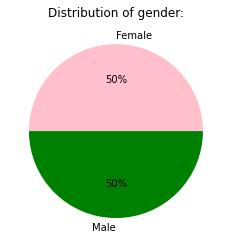

In [9]:
#  Distribution of gender 
print(y.value_counts())
plt.pie(y.value_counts(),labels=["Female","Male"],colors=["pink","green"],autopct='%1.0f%%')
plt.title("Distribution of gender:")
plt.show()

We create a correlation heatmap to see how the variables relate to each other:

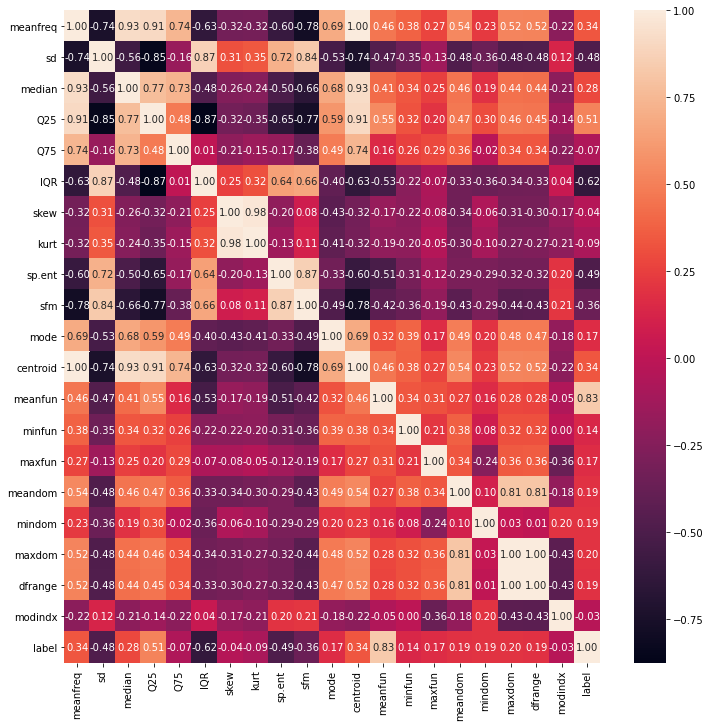

In [10]:
data_corr=data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data_corr,annot=True, fmt= '.2f')

Scatter of Spectral Entropy by Average of Fundamental Frequency Measured Across Acoustic Signal

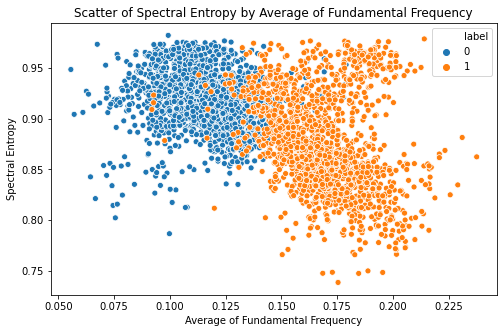

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x="meanfun", y="sp.ent",hue="label")
plt.title("Scatter of Spectral Entropy by Average of Fundamental Frequency")
plt.xlabel("Average of Fundamental Frequency")
plt.ylabel("Spectral Entropy")
plt.show()

Scatter of  Mean Frequency (in kHz) by Average of Fundamental Frequency Measured Across Acoustic Signal

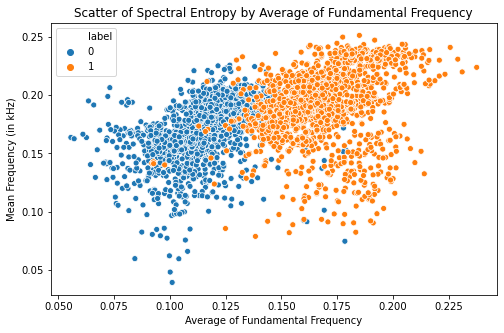

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x="meanfun", y="meanfreq",hue="label")
plt.title("Scatter of Spectral Entropy by Average of Fundamental Frequency")
plt.xlabel("Average of Fundamental Frequency")
plt.ylabel("Mean Frequency (in kHz)")
plt.show()

IQR by Gender (Stripplot):

*(IQR: interquantile range (in kHz))*

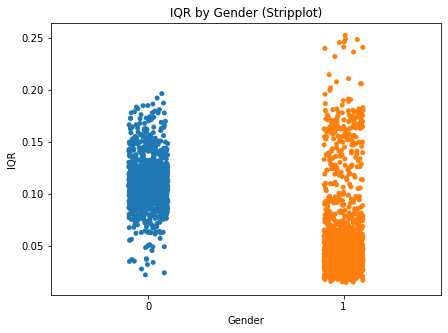

In [13]:
plt.figure(figsize=(7,5))
sns.stripplot(data=data, x="label", y="IQR",jitter=True)
plt.title("IQR by Gender (Stripplot)")
plt.xlabel("Gender")
plt.ylabel("IQR")
plt.show()

<a id="LR"></a>
# Logistic Regression Classification

* Logistic regression is a statistical method used to analyze a data set with one or more independent variables that define a result. 
* In this method the result is defined by two different values (True-False, Yes-No, 1-0, Cat-Dog, Good-Bad ...).
* Purpose of Logistic Regression is build optimal model to describe of link between  a set of independent variables and two dimensional result. Classification is achieved with the created model.


You can examine the structure of this model in detail: [Gender Classification (Logistic Regression)](https://www.kaggle.com/ahmetozdemir1071/gender-classification-logistic-regression)

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("Test Accuracy: {} %".format(lr.score(x_test,y_test)*100))

Test Accuracy: 98.26498422712933 %


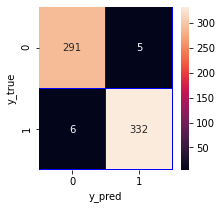

In [15]:
#Confusion matrix:
y_pred_lr=lr.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred_lr,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="blue",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<a id="KNN"></a>
# K-Nearest Neighbor (KNN) Classification

* KNN (K-nearest neighbor) is one of the simplest machine learning algorithms.
* This algorithm memorizes the dataset rather learn it.
* When a prediction is made, the nearest neighbors are searched in the entire data set. 
* To make a prediction, the nearest neighbors in the dataset are searched. 
* The value of k we choose determines how many neighboring elements we will examine. When there is a value to be classified, the distance to the k neighbors is calculated separately. The calculated distances are listed and the corresponding value assigned to the appropriate class. 
* Usually the Euclidean Function is used to calculate the distance.
    Eucliden Function:

eucl.PNG



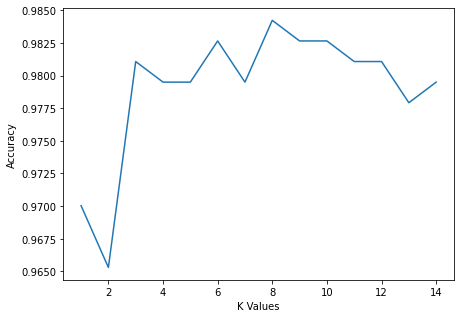

In [16]:
from sklearn.neighbors import KNeighborsClassifier

scoreList=[]
#Let's find the optimal number k
for each in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=each)
    knn.fit(x_train,y_train)
    scoreList.append(knn.score(x_test,y_test))
plt.figure(figsize=(7,5))
plt.plot(range(1,15),scoreList)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

-->>> As shown in the graph above, if we make k = 9, we get the highest accuracy value.

Test Accuracy: 98.26498422712933 %


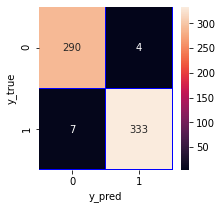

In [17]:
#Confusion matrix (k=9):
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print("Test Accuracy: {} %".format(knn.score(x_test,y_test)*100))
y_pred_knn=knn.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred_knn,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="blue",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<a id="SVM"></a>
# Support Vector Machine Classification

* Support Vector Machine is a supervised learning algorithm based on statistical learning theory.
* It tries to find the optimal line that separates the two labeled classes. 
* The optimal line is the furthest away from members of both classes.
* This model does not have an overfitting problem.
* Easy to apply
* Its accuracy is high.

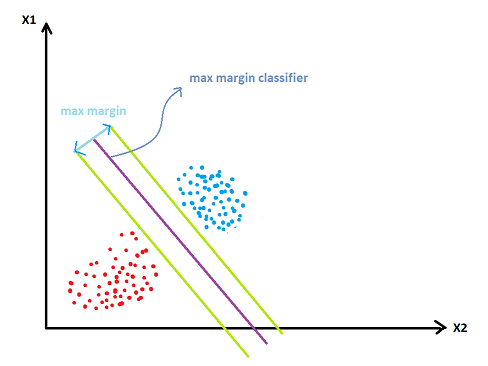
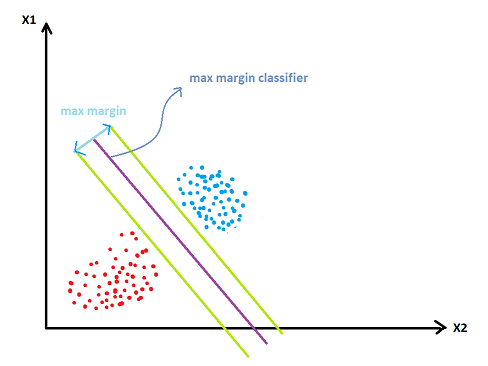

In [18]:
from sklearn.svm import SVC
svm=SVC(random_state=42)
svm.fit(x_train,y_train)
print("Test Accuracy: {} %".format(svm.score(x_test,y_test)*100))

Test Accuracy: 98.42271293375394 %


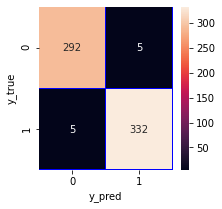

In [19]:
#Confusion matrix:
y_pred_svm=svm.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred_svm,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="blue",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<a id="NBC"></a>
# Naive Bayes Classification

* Naive Bayes classification is based on Bayes' Theorem.
* Baye' Theorem shows the relationship between conditional probabilities and marginal probabilities within the probability distribution for a random variable. (Wikipedia)
* Calculate the probability of each state for an element and classify it according to the one with the highest probability value.
* In this algorithm  probability of each state is calculated for an element and classified according to the highest probability value.

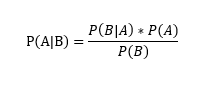

            P(A|B): Probability that event A will occur when event B occurs.
            P(A): The probability of event A will occur
            P(B|A): The probability that event B will occur when event A occurs
            P(B): The probability of event B will occur
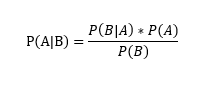

In [20]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print("Test Accuracy: {} %".format(nb.score(x_test,y_test)*100))

Test Accuracy: 90.85173501577287 %


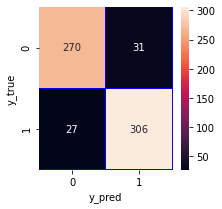

In [21]:
#Confusion matrix:
y_pred_nb=nb.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred_nb,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="blue",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<a id="DTC"></a>
# Decision Tree Claasification

* Decision trees  classification is a classification method that creates a model in the form of a tree structure consisting of decision nodes and leaf nodes by feature and target.
* It can process both numerical and categorical data.
* It is easy to understand and interpret.
* This model can address multi-output problems.
* Overfitting may occur in this model.

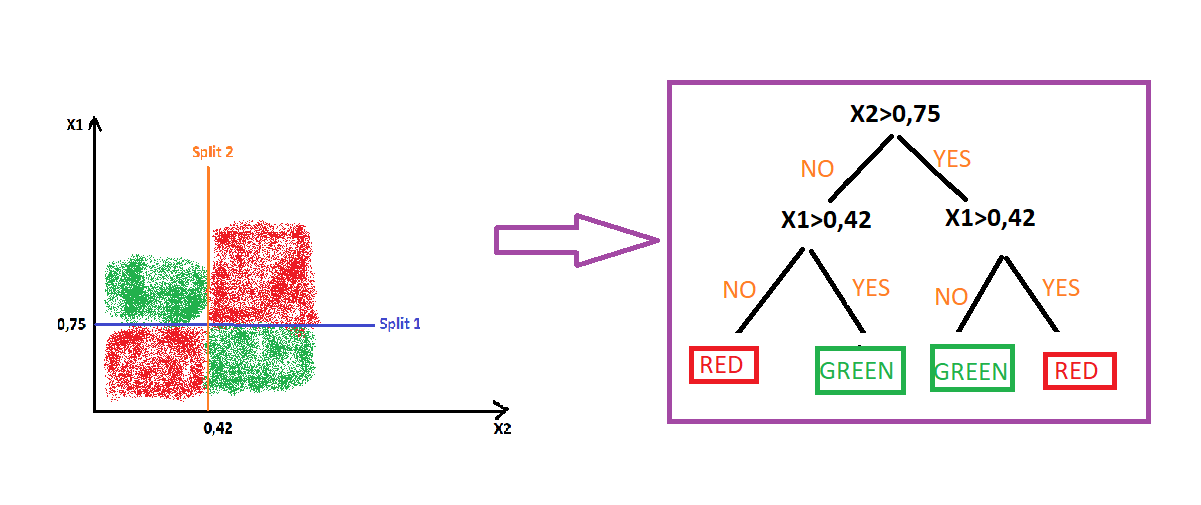
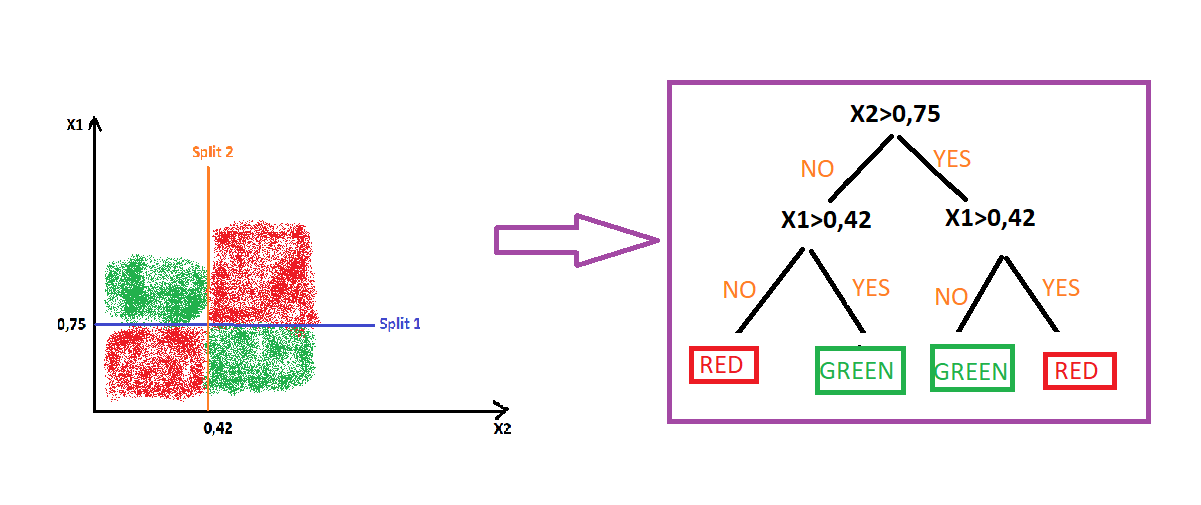

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Test Accuracy: {} %".format(dt.score(x_test,y_test)*100))

Test Accuracy: 96.21451104100946 %


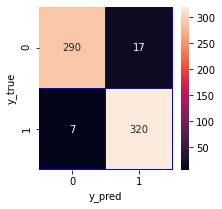

In [23]:
#Confusion matrix:
y_pred_dt=dt.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred_dt,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="blue",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<a id="RFC"></a>
# Random Forest Classification

* The basic structure of this model consists of decision trees.
* If we build n trees using random values in the dataset, actually we create a random forest model. So random forest is collected trees that built by random values and has branches.
* The algorithm creates so many tree structures that it helps to get the best results from the results. Voting is done within the results and correct branches are created.
* Decision Trees' biggest problem is overfitting. This problem is less in Random Forest since training on different datasets.

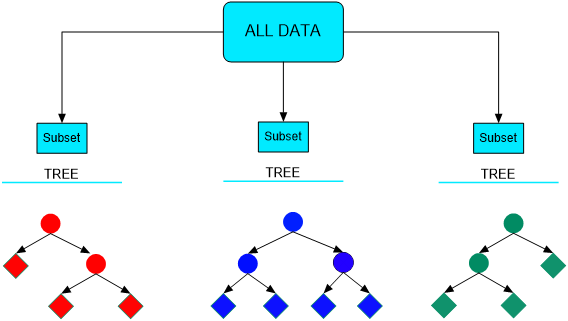
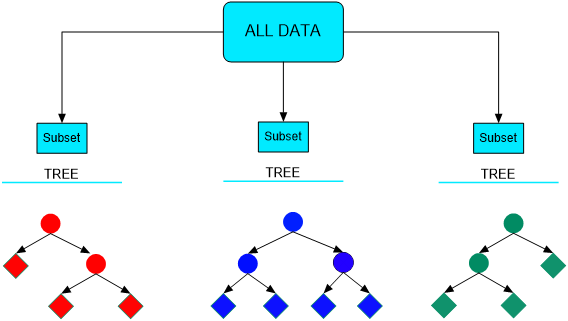

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,random_state=42)
rf.fit(x_train,y_train)
print("Test Accuracy = {} %".format(rf.score(x_test,y_test)*100))

Test Accuracy = 97.79179810725552 %


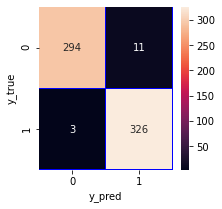

In [25]:
#Confusion Matrix
y_pred_rf=rf.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred_rf,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="blue",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Last Words
* Among the algorithms we applied, we reached the highest accuracy in the Support Vector Machine algorithm, and the lowest accuracy in the Naive Bayes Algorithm. However, this does not mean that these two algorithms are the best and the worst for our data.
* Some of the models we use are used for both classification and regression but we examined the issue of classification.
* All models we apply are supervised learning algorithms.

* Thanks [DATAI](https://www.kaggle.com/kanncaa1/notebooks)

